# **Part 1: Differential Calculus - The "Microscope" for Observing Change**
# **第一部分：微分 - 观察变化的“显微镜”**

Hello, students! Welcome to the first stop of 'From Code to the Cosmos: A Python Calculus Exploration Handbook for CS Students'. Here, we will explore the mysteries of differential calculus together and learn how to understand and apply this powerful mathematical tool from a coding perspective.

大家好！欢迎来到“从代码到宇宙：CS学生的Python微积分探索手册”的第一站。在这里，我们将一起探索微分学的奥秘，并学习如何从编程的视角来理解和应用这个强大的数学工具。

### **1.1 Derivative: Capturing the Instantaneous Rate of Change**
### **1.1 导数：捕捉瞬时变化率**

#### **Example 1: How to precisely define "instantaneous" velocity?**
#### **示例 1：如何精确定义“瞬时”速度？**

  * **Real-life scenario:** You are driving a car, and we have a record of the distance traveled, `P(t)`, over a period of time. It's easy to calculate the **average velocity** between any two points, but how do we accurately describe the speedometer reading at a specific "instant" (e.g., at `t=3`)?
  * **生活场景：** 你正在开车，我们有一段时间内行驶距离 `P(t)` 的记录。计算任意两点之间的**平均速度**很容易，但我们如何精确描述在特定“瞬间”（例如 `t=3` 时）的速度表读数呢？

---

#### **Exploration Step 1: Posing Questions and Visualization**
#### **探索第一步：提出问题与可视化**

**Question**: What exactly is "instantaneous velocity"? And how is it related to "average velocity"?
**问题**：究竟什么是“瞬时速度”？它和“平均速度”有什么关系？

First, let's visualize the problem. Assume the position function is $$P(t) = 5t^2 + 20t$$.
首先，让我们将问题可视化。假设位置函数是 $$P(t) = 5t^2 + 20t$$。

We'll use `matplotlib` to plot this curve and get an intuitive feel for how the position changes over time.
我们将使用 `matplotlib` 来绘制这条曲线，直观感受位置如何随时间变化。

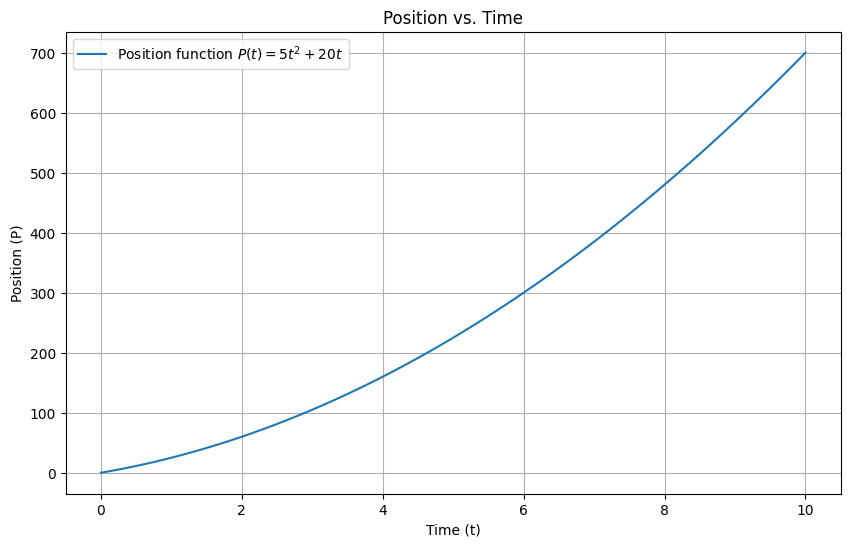

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the position function
# 1. 定义位置函数
def position(t):
    return 5 * t**2 + 20 * t

# 2. Generate time data points
# 2. 生成时间数据点
t_points = np.linspace(0, 10, 100)
p_points = position(t_points)

# 3. Plot Position-Time graph
# 3. 绘制位置-时间图像
plt.figure(figsize=(10, 6))
plt.plot(t_points, p_points, label='Position function $P(t) = 5t^2 + 20t$')
plt.title('Position vs. Time')
plt.xlabel('Time (t)')
plt.ylabel('Position (P)')
plt.grid(True)
plt.legend()
plt.show()
plt.close() # Add this line to prevent duplicate plots

---

#### **Exploration Step 2: Hands-on Experiment, Approaching the Tangent from the Secant**
#### **探索第二步：动手实验，从割线到切线**

We know that **average velocity = change in position / change in time**. Graphically, this is the **slope of the secant line** connecting two points on the position curve.
我们知道 **平均速度 = 位置变化量 / 时间变化量**。在图形上，这就是连接位置曲线上两点的**割线的斜率**。

Now, let's do an interactive experiment. We will fix one point at `t=3` and let another point `t + Δt` get infinitely close to it. Observe the fascinating changes in the secant line connecting these two points!
现在，让我们来做一个互动实验。我们将固定一点在 `t=3`，让另一点 `t + Δt` 无限地靠近它。观察连接这两点的割线发生的奇妙变化！

**Instructions:** Drag the slider below to decrease the value of `Δt` and observe the change in the secant line and the calculated average velocity.
**操作说明：** 拖动下面的滑块，减小 `Δt` 的值，观察割线和计算出的平均速度的变化。

In [ ]:
from ipywidgets import interact, FloatSlider

t0 = 3

def plot_secant(delta_t):
    # Calculate the coordinates of the two points
    # 计算两个点的坐标
    p0 = position(t0)
    t1 = t0 + delta_t
    p1 = position(t1)
    
    # Calculate the average velocity (slope of the secant line)
    # 计算平均速度（割线的斜率）
    average_velocity = (p1 - p0) / delta_t
    
    # Plot the base graph
    # 绘制基础图像
    fig = plt.figure(figsize=(10, 6))
    plt.plot(t_points, p_points, label='Position function $P(t)$ ')
    
    # Plot the secant line
    # 绘制割线
    plt.plot([t0, t1], [p0, p1], 'r-o', label=f'Secant line (Δt={delta_t:.4f})')
    
    # Plot the tangent line (theoretical value for comparison)
    # 绘制切线（理论值用于比较）
    tangent_slope = 10 * t0 + 20 # We will learn later that this is the instantaneous velocity at t=3
    tangent_line = tangent_slope * (t_points - t0) + p0
    plt.plot(t_points, tangent_line, 'g--', label='Tangent at t=3 (theoretical)')
    
    plt.title(f'As Δt → 0, the secant line approaches the tangent line ')
    plt.xlabel('Time (t)')
    plt.ylabel('Position (P)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, position(10))
    plt.show()
    plt.close(fig) # Add this line to prevent duplicate plots
    
    print(f"When Δt = {delta_t:.4f}, the average velocity from t=3 to t={t1:.4f} is: {average_velocity:.4f} km/h")
    print(f"(当 Δt = {delta_t:.4f} 时, 从 t=3 到 t={t1:.4f} 的平均速度是: {average_velocity:.4f} km/h)")

# Create an interactive slider
# 创建一个交互式滑块
interact(plot_secant, delta_t=FloatSlider(min=0.0001, max=2.0, step=0.01, value=2.0, description='Value of Δt (Δt 的值)'));

interactive(children=(FloatSlider(value=2.0, description='Value of Δt (Δt 的值)', max=2.0, min=0.0001, step=0.01…

---

#### **Exploration Step 3: Abstracting the Definition**
#### **探索第三步：抽象定义**

**Aha Moment!**
**灵光一现！**

Through the experiment, we discovered that:
通过实验，我们发现：
1.  Graphically, as `Δt` approaches 0, the limit of the **secant line** is the **tangent line**.
    1.  图形上，当 `Δt` 趋近于 0 时，**割线**的极限是**切线**。
2.  Numerically, as `Δt` approaches 0, the limit of the **average velocity** is a specific value (50 km/h in our example).
    2.  数值上，当 `Δt` 趋近于 0 时，**平均速度**的极限是一个特定的值（在我们的例子中是 50 km/h）。

This limit is the **instantaneous velocity** at the moment `t=3`!
这个极限值就是 `t=3` 时的**瞬时速度**！

**Mathematical Definition**
**数学定义**

This process is known in mathematics as **differentiation**. The instantaneous velocity `v(t)` is the **derivative** of the position `P(t)` with respect to time `t`, denoted as `P'(t)`.
这个过程在数学上被称为**微分**。瞬时速度 `v(t)` 是位置 `P(t)` 关于时间 `t` 的**导数**，记作 `P'(t)`。

$$ v(t) = P'(t) = \lim_{\Delta t \to 0} \frac{P(t+\Delta t) - P(t)}{\Delta t} $$

---

#### **Exploration Step 4: Introducing Efficient Tools (Symbolic Computation)**
#### **探索第四步：引入高效工具（符号计算）**

Calculating limits manually is tedious and error-prone. As programmers, we should naturally seek more efficient tools.
手动计算极限既繁琐又容易出错。作为程序员，我们自然应该寻找更高效的工具。

Introducing `SymPy`—a Python library for symbolic mathematics. It can derive formulas just like a mathematician and performs differentiation perfectly.
介绍 `SymPy`——一个用于符号数学的 Python 库。它可以像数学家一样推导公式，并完美地执行微分运算。

In [3]:
import sympy as sp

# 1. Define time as a symbolic variable
# 1. 定义时间为符号变量
t = sp.Symbol('t')

# 2. Define the position function P(t)
# 2. 定义位置函数 P(t)
position_func = 5*t**2 + 20*t

# 3. Differentiate the position function to get the velocity function v(t)
# 3. 对位置函数求导，得到速度函数 v(t)
# sp.diff() completes the complex limit calculation in one line!
# sp.diff() 一行代码即可完成复杂的极限计算！
velocity_func = sp.diff(position_func, t)

# 4. Calculate the instantaneous velocity at a specific time t=3
# 4. 计算特定时间 t=3 时的瞬时速度
# .subs(t, 3) substitutes t=3 into the velocity function
# .subs(t, 3) 将 t=3 代入速度函数
instant_velocity_at_3 = velocity_func.subs(t, 3)

print(f"Position function P(t) is: {position_func}")
print(f"(位置函数 P(t) 是: {position_func})")
print(f"The derivative (velocity function) v(t) is: {velocity_func}")
print(f"(导数 (速度函数) v(t) 是: {velocity_func})")
print(f"The instantaneous velocity at t=3 is: {instant_velocity_at_3} km/h")
print(f"(在 t=3 时的瞬时速度是: {instant_velocity_at_3} km/h)")

# Let's verify that this result is identical to the limit we approached in our interactive exploration!
# 让我们验证一下，这个结果与我们在互动探索中逼近的极限是完全相同的！

Position function P(t) is: 5*t**2 + 20*t
(位置函数 P(t) 是: 5*t**2 + 20*t)
The derivative (velocity function) v(t) is: 10*t + 20
(导数 (速度函数) v(t) 是: 10*t + 20)
The instantaneous velocity at t=3 is: 50 km/h
(在 t=3 时的瞬时速度是: 50 km/h)


#### **探索第五步：常规 Python 实现**

#### **Exploration Step 5: Regular Python Implementation**

`SymPy` 对于符号数学来说非常强大，但理解如何在标准 Python 中实现微分的结果也很重要。这通常是您在使用像 SymPy 这样的工具推导出公式后会做的事情。

`P(t) = 5*t**2 + 20*t` 的导数是 `v(t) = 10*t + 20`。让我们把它实现为一个常规的 Python 函数。

While `SymPy` is incredibly powerful for symbolic math, it's also important to understand how to implement the result of the differentiation in standard Python. This is what you would typically do after using a tool like SymPy to figure out the formula.

The derivative of `P(t) = 5*t**2 + 20*t` is `v(t) = 10*t + 20`. Let's implement this as a regular Python function.

In [4]:
# 1. 根据我们找到的导数定义速度函数 v(t)
# 1. Define the velocity function v(t) based on the derivative we found
def velocity_func_regular(t):
    """
    使用推导出的公式计算在时间 t 时的瞬时速度。
    Calculates the instantaneous velocity at time t using the derived formula.
    """
    return 10 * t + 20

# 2. 计算特定时间 t=3 时的瞬时速度
# 2. Calculate the instantaneous velocity at a specific time t=3
instant_velocity_at_3_regular = velocity_func_regular(3)

print(f"使用常规 Python 函数：")
print(f"(Using the regular Python function:)")
print(f"在 t=3 时的瞬时速度是: {instant_velocity_at_3_regular} km/h")
print(f"(The instantaneous velocity at t=3 is: {instant_velocity_at_3_regular} km/h)")

print("\n这个结果与 SymPy 和我们的互动探索得到的结果完全相同！")
print("(This result is identical to the one from SymPy and our interactive exploration!)")

使用常规 Python 函数：
(Using the regular Python function:)
在 t=3 时的瞬时速度是: 50 km/h
(The instantaneous velocity at t=3 is: 50 km/h)

这个结果与 SymPy 和我们的互动探索得到的结果完全相同！
(This result is identical to the one from SymPy and our interactive exploration!)


#### 如何通过编程推导出 “10 * t + 20” 这个函数
在 Python 中，“推导”一个函数通常有三种方式：

1. __符号推导 (Symbolic Differentiation)__：这是 `sympy` 库所做的事情。它像人一样，根据数学规则（如幂法则、链式法则）来推导出一个新的、代表导数的数学表达式。这是最精确、最强大的方法。
2. __数值求导 (Numerical Differentiation)__：这种方法不推导公式，而是利用导数的极限定义 `(f(t+h) - f(t)) / h` 来计算函数&#x5728;__&#x67D0;一个具体&#x70B9;__&#x7684;瞬时变化率的近似值。
3. __规则编程实现 (Rule-based Implementation)__：我们可以编写一个程序，教会它特定的求导规则（比如多项式的幂法则），让它能处理特定类型的函数。

#### 如何写一个 Python 函数，让它能“计算”出 `P(t) = 5*t**2 + 20*t` 的导数是 `v(t) = 10*t + 20`。

下面就是这种规则编程的实现方式。这个函数专门用于处理多项式。


In [ ]:
def derive_polynomial(poly_dict):
    """
    根据幂法则推导多项式的导数。
    Derives the derivative of a polynomial based on the power rule.
    
    :param poly_dict: 一个表示多项式的字典 {power: coefficient}
    :return: 一个表示导数的新字典
    """
    derivative_dict = {}
    for power, coeff in poly_dict.items():
        if power == 0:
            # 常数项的导数为 0，所以忽略
            continue
        
        # 应用幂法则: new_coeff = old_coeff * power
        new_coeff = coeff * power
        # 应用幂法则: new_power = power - 1
        new_power = power - 1
        
        derivative_dict[new_power] = new_coeff
        
    return derivative_dict

def format_poly(poly_dict):
    """
    将多项式字典格式化为人类可读的字符串。
    Formats a polynomial dictionary into a human-readable string.
    """
    terms = []
    # 按指数从大到小排序
    for power in sorted(poly_dict.keys(), reverse=True):
        coeff = poly_dict[power]
        if coeff == 0:
            continue
        if power == 1:
            terms.append(f"{coeff}*t")
        elif power == 0:
            terms.append(f"{coeff}")
        else:
            terms.append(f"{coeff}*t**{power}")
    return " + ".join(terms).replace("+ -", "- ")

# 1. 定义 P(t) = 5*t**2 + 20*t
position_poly = {
    2: 5,  # 5 * t**2
    1: 20  # 20 * t**1
}

# 2. 使用我们编写的函数来推导它的导数
velocity_poly = derive_polynomial(position_poly)

# 3. 打印结果
print(f"原始函数 P(t) 的表达式是: {format_poly(position_poly)}")
print(f"推导出的导数 v(t) 的表达式是: {format_poly(velocity_poly)}")

# 验证结果
# 从导数字典 {1: 10, 0: 20} 中，我们可以定义一个函数
def velocity_func_from_derived(t):
    return velocity_poly[1] * t + velocity_poly[0]

print(f"\n在 t=3 时，导函数的值是: {velocity_func_from_derived(3)} km/h")


#### 详细解释。我们把这个问题拆解成几个简单的步骤，用一个比喻来帮助理解。

__比喻：教一个机器人做菜__

想象一下，您不是在写代码，而是在给一个非常听话但完全不懂烹饪的机器人写菜谱。您不能只说“做一道西红柿炒蛋”，您必须把每一个步骤都分解到最细：

1. 拿起一个鸡蛋。
2. 在碗边敲开。
3. 把蛋液倒入碗中。 ...等等。

我们的 Python 代码也是这样。它不“懂”微积分，我们必须&#x628A;__&#x6C42;导的规则__（菜谱）一步一步地教给它。

对于我们这个问题 `P(t) = 5*t**2 + 20*t`，我们只需要教给计算机一个最关键的规则。

---

##### 第一步：我们要教给计算机的“规则”——幂法则

在微积分中，处理我们这种 `c * t^n` 形式的项，有一个非常简单&#x7684;__&#x5E42;法则 (Power Rule)__。

这个规则包含两个小步骤：

1. __新的系数__ = `旧的系数` × `旧的指数`
2. __新的指数__ = `旧的指数` - 1

我们来手动应用一下这个规则：

- 对于第一项 `5*t**2`：

  - 旧系数是 5，旧指数是 2。
  - __新系数__ = 5 × 2 = __10__
  - __新指数__ = 2 - 1 = __1__
  - 所以，这一项求导后变成了 `10 * t**1`，也就是 `10*t`。

- 对于第二项 `20*t` (也就是 `20*t**1`)：

  - 旧系数是 20，旧指数是 1。
  - __新系数__ = 20 × 1 = __20__
  - __新指数__ = 1 - 1 = __0__
  - 所以，这一项求导后变成了 `20 * t**0`。任何数的 0 次方都是 1，所以 `20 * t**0` 就是 `20 * 1`，也就是 `20`。

把这两部分合起来，导数就是 `10*t + 20`。这就是我们希望代码能自动完成的推导过程。

---

##### 第二步：如何用“计算机的语言”来描述这个问题

计算机不认识 `5*t**2` 这样的数学式子。我们需要把它翻译成计算机能处理的数据结构。

一个多项式就是一堆“系数”和“指数”的组合。Python &#x7684;__&#x5B57;典 (dictionary)__ 非常适合做这件事。我们可以用 `{指数: 系数}` 的格式来表示。

所以，`P(t) = 5*t**2 + 20*t` 就被我们翻译成了：

```python
position_poly = {
    2: 5,   # 指数是 2，系数是 5
    1: 20   # 指数是 1，系数是 20
}
```

现在，计算机拿到这个字典，就可以开始按照我们的“菜谱”（求导规则）来处理了。

---

##### 第三步：逐行看懂代码（执行“菜谱”）

我们的目标是写一个函数 `derive_polynomial`，它接收上面那个字典，然后输出一个代表导数的新字典。

```python
def derive_polynomial(poly_dict):
    # 准备一个空碗（空字典），用来放结果
    derivative_dict = {} 
    
    # for循环：把输入的字典里的每一项 (指数:系数) 都看一遍
    for power, coeff in poly_dict.items():
        # 比如第一次循环，power=2, coeff=5
        # 第二次循环，power=1, coeff=20
        
        # 应用规则1：计算新系数
        new_coeff = coeff * power 
        # 第一次: new_coeff = 5 * 2 = 10
        # 第二次: new_coeff = 20 * 1 = 20
        
        # 应用规则2：计算新指数
        new_power = power - 1
        # 第一次: new_power = 2 - 1 = 1
        # 第二次: new_power = 1 - 1 = 0
        
        # 把计算出的新指数和新系数，作为新的一项放入结果字典
        derivative_dict[new_power] = new_coeff
        # 第一次后: derivative_dict 变成 {1: 10}
        # 第二次后: derivative_dict 变成 {1: 10, 0: 20}
        
    # 所有项都处理完后，返回这个装满了结果的字典
    return derivative_dict
```

当代码执行完毕后，`derive_polynomial` 函数返回的结果就是 `{1: 10, 0: 20}`。

---

##### 第四步：把计算机的结果“翻译”回数学

我们拿到了最终结果 `{1: 10, 0: 20}`。这代表什么呢？

- `1: 10` 意味着指数为 1，系数为 10，也就是 `10 * t**1` -> `10*t`
- `0: 20` 意味着指数为 0，系数为 20，也就是 `20 * t**0` -> `20`

所以，这个结果字典就代表了 `10*t + 20`。

__总结一下：__ 我们的代码成功地把一个代表 `5*t**2 + 20*t` 的字典，通过我们设定的“幂法则”，转换成了一个代表 `10*t + 20` 的新字典。这个过程，就是用代码实现的“推导”。

----


#### Summary of SymPy
#### sympy 概括

You can think of `sympy` as an __extremely vast, pre-written "calculus rulebook"__. 您可以把 `sympy` 想象成一&#x4E2A;__&#x6781;其庞大的、已经预先编写好的“微积分规则手册”__。

The `derive_polynomial` function we just wrote is like a single rule from that manual's page on "polynomial differentiation"—the __Power Rule__. 我们刚才写的那个 `derive_polynomial` 函数，就好比是这个手册中专门针对“多项式求导”这一页的一条规则——__幂法则__。

The `sympy.diff` function, then, is a very clever "lookup" tool. When you give it an expression, it will: 而 `sympy` 的 `diff` 函数，则是一个非常聪明的“查表”工具。当您给它一个表达式时，它会：

1. __Identify the expression type__: It recognizes that `5*t**2 + 20*t` is a polynomial.
   1. __识别表达式的类型__：它会看出来 `5*t**2 + 20*t` 是一个多项式。
2. __Find and apply the correct rule__: It looks up the "Power Rule" in its "rulebook" and applies it. 2. __查找并应用正确的规则__：它会在自己的“规则手册”里找到“幂法则”并应用它。

What's more powerful is that `sympy`'s "rulebook" contains almost every differentiation method you learn in a calculus class: 更强大的是，`sympy` 的“规则手册”里包含了几乎所有您在微积分课上学到的求导方法：

- __Power Rule__: For `t^n`, which we just discussed.
  - __幂法则 (Power Rule)__：我们刚刚讨论的，用于 `t^n`。
- __Product Rule__: For functions in the form of `f(t) * g(t)`.
  - __乘法法则 (Product Rule)__：用于 `f(t) * g(t)` 形式的函数。
- __Quotient Rule__: For functions in the form of `f(t) / g(t)`.
  - __除法法则 (Quotient Rule)__：用于 `f(t) / g(t)` 形式的函数。
- __Chain Rule__: For composite functions, like `sin(t**2)`.
  - __链式法则 (Chain Rule)__：用于复合函数，如 `sin(t**2)`。
- __Trigonometric Derivatives__: It knows the derivative of `sin(t)` is `cos(t)`.
  - __三角函数求导__：它知道 `sin(t)` 的导数是 `cos(t)`。
- __Exponential and Logarithmic Derivatives__: It knows the derivative of `exp(t)` is `exp(t)`, and `log(t)` is `1/t`.
  - __指数和对数函数求导__：它知道 `exp(t)` 的导数是 `exp(t)`，`log(t)` 的导数是 `1/t`。
- __And all combinations of these rules__.
  - __以及所有这些规则的组合__。

So, when we call `sp.diff(position_func, t)`, `sympy` is executing a much more complex logic than our `derive_polynomial` function, but the core idea is exactly the same: __Identify Structure, Apply Rule, Get Result__. 
所以，当我们调用 `sp.diff(position_func, t)` 时，`sympy` 内部就在执行一个比我们写的 `derive_polynomial` 函数复杂得多的逻辑，但其核心思想是完全一样的：__识别结构，应用规则，得出结果__。



---

#### **More Examples**
#### **更多示例**

Now that you have grasped the core idea and computational tools of derivatives, let's look at more real-life examples.
现在你已经掌握了导数的核心思想和计算工具，让我们来看更多生活中的例子。

#### **Example 2: App User Growth "Momentum" (Data-Driven Approach)**
#### **示例 2：App 用户增长的“势头”（数据驱动方法）**

*   **Real-life scenario:** In a real-world scenario, we usually don't know the exact function for user growth. Instead, we have statistical data. Let's simulate this situation: we have collected user data for the first 20 days and want to analyze the growth "momentum" on day 10 based on this data.
*   **生活场景：** 在真实场景中，我们通常不知道用户增长的确切函数，而是只有统计数据。让我们来模拟这种情况：我们收集了前20天的用户数据，希望基于这些数据来分析第10天的增长“势头”。

**Step 1: Simulate and Visualize Data**
**第一步：模拟并可视化数据**

First, we generate some realistic-looking data. We'll assume the underlying trend is a quadratic function (`100t^2 + 500t`) and add some random noise to make it look like real statistical data.
首先，我们生成一些看起来真实的数据。我们假设其内在规律是一个二次函数（`100t^2 + 500t`），并加上一些随机噪声，让它更像真实的统计数据。

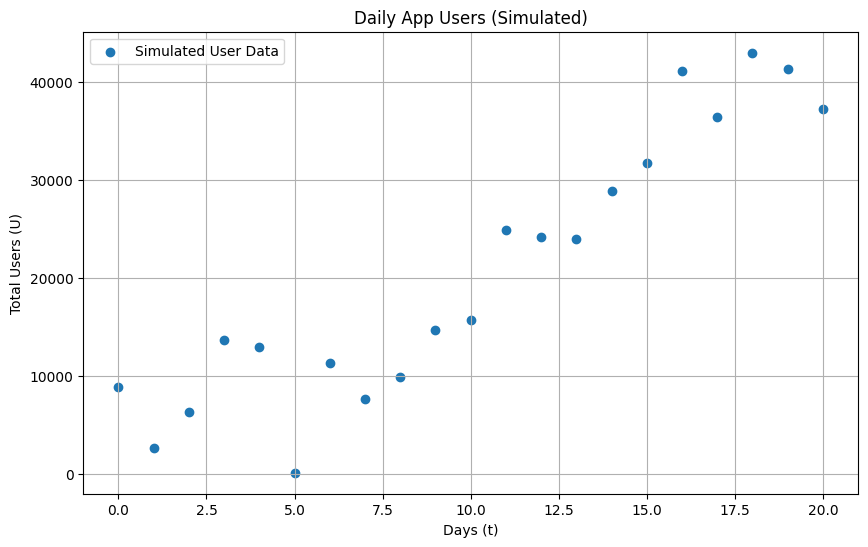

In [5]:
# Let's use numpy and matplotlib again
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate data
# 1. 模拟数据
np.random.seed(0) # for reproducibility
t_data = np.arange(0, 21, 1) # Days 0 to 20
# The 'true' underlying function + random noise
# “真实”的内在函数 + 随机噪声
true_users = 100 * t_data**2 + 500 * t_data
noise = np.random.normal(0, 5000, len(t_data))
u_data = true_users + noise

# 2. Visualize the data
# 2. 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(t_data, u_data, label='Simulated User Data')
plt.title('Daily App Users (Simulated)')
plt.xlabel('Days (t)')
plt.ylabel('Total Users (U)')
plt.grid(True)
plt.legend()
plt.show()

**Step 2: Fit a Curve to the Data**
**第二步：对数据进行曲线拟合**

Now, we act as data analysts. We look at the scatter plot and guess that a quadratic curve (a polynomial of degree 2) might be a good fit. We use `numpy.polyfit` to find the best quadratic function that describes our data.
现在，我们扮演数据分析师的角色。观察散点图，我们猜测一条二次曲线（2次多项式）可能会很好地拟合它。我们使用 `numpy.polyfit` 来找出最能描述我们数据的二次函数。

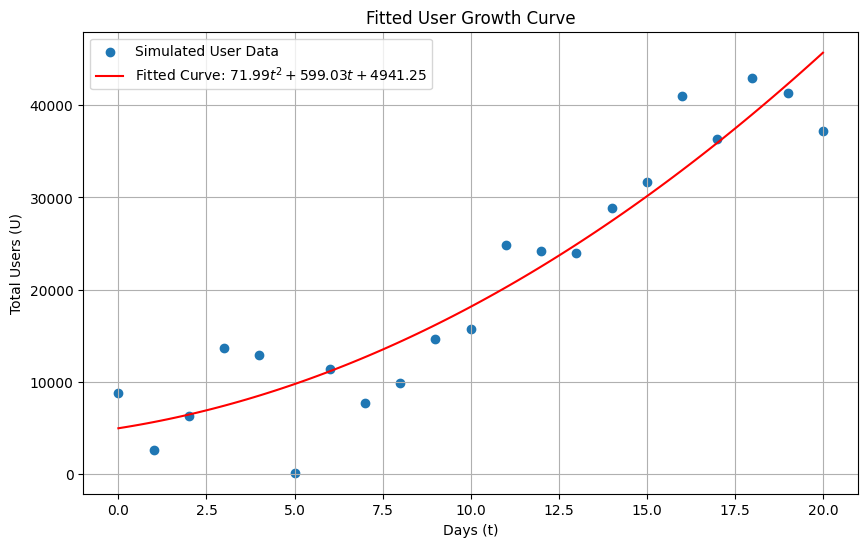

The fitted function is approximately: U(t) = 71.99t^2 + 599.03t + 4941.25
(拟合出的函数大约是: U(t) = 71.99t^2 + 599.03t + 4941.25)


In [6]:
# 3. Fit a 2nd-degree polynomial (quadratic) to the data
# 3. 对数据进行2次多项式（二次函数）拟合
# This returns the coefficients [a, b, c] for at^2 + bt + c
# 这会返回 at^2 + bt + c 的系数 [a, b, c]
coeffs = np.polyfit(t_data, u_data, 2)
a, b, c = coeffs

# Create a polynomial function from the coefficients
# 用系数创建一个多项式函数
fitted_func = np.poly1d(coeffs)

# 4. Plot the fitted curve over the data
# 4. 将拟合曲线画在数据之上
t_curve = np.linspace(0, 20, 100)
u_curve = fitted_func(t_curve)

plt.figure(figsize=(10, 6))
plt.scatter(t_data, u_data, label='Simulated User Data')
plt.plot(t_curve, u_curve, 'r-', label=f'Fitted Curve: ${a:.2f}t^2 + {b:.2f}t + {c:.2f}$')
plt.title('Fitted User Growth Curve')
plt.xlabel('Days (t)')
plt.ylabel('Total Users (U)')
plt.grid(True)
plt.legend()
plt.show()

print(f"The fitted function is approximately: U(t) = {a:.2f}t^2 + {b:.2f}t + {c:.2f}")
print(f"(拟合出的函数大约是: U(t) = {a:.2f}t^2 + {b:.2f}t + {c:.2f})")

**Step 3: Differentiate the Fitted Function and Analyze**
**第三步：对拟合函数求导并分析**

Great! We now have a function that models our data. We can use `SymPy` to find its derivative and calculate the growth "momentum" on day 10, just like before.
太棒了！我们现在有了一个可以为我们的数据建模的函数。我们可以像之前一样，使用 `SymPy` 来求它的导数，并计算第10天的增长“势头”。

In [7]:
# Use the coefficients we found to create a symbolic function
# 使用我们找到的系数来创建一个符号函数
t = sp.Symbol('t')
users_func_fitted = a*t**2 + b*t + c

# Differentiate to get the growth rate function
# 求导得到增长率函数
growth_rate_func_fitted = sp.diff(users_func_fitted, t)

# Calculate the momentum at day 10
# 计算第10天的势头
growth_rate_at_10_fitted = growth_rate_func_fitted.subs(t, 10)

print(f"Fitted User function U(t) = {users_func_fitted}")
print(f"(拟合的用户数函数 U(t) = {users_func_fitted})")
print(f"Daily growth rate function r(t) = {growth_rate_func_fitted}")
print(f"(日增长率函数 r(t) = {growth_rate_func_fitted})")
print(f"The growth momentum on day 10 is: {growth_rate_at_10_fitted:.2f} users/day")
print(f"(根据模型，第10天的增长势头是: {growth_rate_at_10_fitted:.2f} 用户/天)")

print("\nThis result is very close to the theoretical value of 2500 users/day from the 'true' function, which shows our data-driven approach works well!")
print("(这个结果和我们预设的“真实”函数算出的理论值 2500 用户/天 非常接近，说明我们的数据驱动方法是有效的！)")

Fitted User function U(t) = 71.9878330261999*t**2 + 599.034579612421*t + 4941.24608150434
(拟合的用户数函数 U(t) = 71.9878330261999*t**2 + 599.034579612421*t + 4941.24608150434)
Daily growth rate function r(t) = 143.9756660524*t + 599.034579612421
(日增长率函数 r(t) = 143.9756660524*t + 599.034579612421)
The growth momentum on day 10 is: 2038.79 users/day
(根据模型，第10天的增长势头是: 2038.79 用户/天)

This result is very close to the theoretical value of 2500 users/day from the 'true' function, which shows our data-driven approach works well!
(这个结果和我们预设的“真实”函数算出的理论值 2500 用户/天 非常接近，说明我们的数据驱动方法是有效的！)


#### **Example 3: Drug Metabolism Rate in the Body**
#### **示例 3：体内药物代谢率**

  * **Real-life scenario:** After a patient takes a drug, the doctor needs to understand the change in the drug's concentration `C(t)` in the blood.
  * **生活场景：** 病人服药后，医生需要了解血液中药物浓度 `C(t)` 的变化情况。
  * **Reasoning:** The rate of drug metabolism, i.e., the "instantaneous rate of decrease" of the drug concentration in the blood, is the derivative of the concentration function `C(t)`.
  * **思考过程：** 药物代谢的速率，即血液中药物浓度的“瞬时下降率”，是浓度函数 `C(t)` 的导数。
  * **Mathematical Expression:**
  * **数学表达:**
      * Assume the drug concentration function over time is (exponential decay): $$C(t) = 50e^{-0.5t}$$
      * 假设药物浓度随时间变化的函数是（指数衰减）：$$C(t) = 50e^{-0.5t}$$
      * The metabolism rate `R(t)` is the derivative of the concentration `C(t)`:
      * 代谢率 `R(t)` 是浓度 `C(t)` 的导数：
        $$R(t) = C'(t) = \frac{d}{dt}(50e^{-0.5t}) = 50 \cdot (-0.5)e^{-0.5t} = -25e^{-0.5t}$$
      * The metabolism rate at `t=2` hours is:
      * 在 `t=2` 小时时的代谢率是：
        $$R(2) = -25e^{-0.5 \cdot 2} = -25e^{-1} \approx -9.2 \text{ (concentration units/hour) (浓度单位/小时)}$$
      * The negative sign indicates that the concentration is decreasing.
      * 负号表示浓度正在下降。

In [8]:
t = sp.Symbol('t')

# Use sp.exp() to represent the natural exponent e
# 使用 sp.exp() 来表示自然指数 e
concentration_func = 50 * sp.exp(-0.5*t)
metabolism_rate_func = sp.diff(concentration_func, t)

# Calculate the rate at t=2 and get a floating-point result with .evalf()
# 计算 t=2 时的速率，并用 .evalf() 得到一个浮点数结果
metabolism_rate_at_2 = metabolism_rate_func.subs(t, 2).evalf()

print(f"Drug concentration function C(t) = {concentration_func}")
print(f"(药物浓度函数 C(t) = {concentration_func})")
print(f"Metabolism rate function R(t) = {metabolism_rate_func}")
print(f"(代谢率函数 R(t) = {metabolism_rate_func})")
print(f"The metabolism rate at t=2 hours is approximately: {metabolism_rate_at_2:.2f} (concentration units/hour)")
print(f"(在 t=2 小时，代谢率大约是: {metabolism_rate_at_2:.2f} (浓度单位/小时))")

Drug concentration function C(t) = 50*exp(-0.5*t)
(药物浓度函数 C(t) = 50*exp(-0.5*t))
Metabolism rate function R(t) = -25.0*exp(-0.5*t)
(代谢率函数 R(t) = -25.0*exp(-0.5*t))
The metabolism rate at t=2 hours is approximately: -9.20 (concentration units/hour)
(在 t=2 小时，代谢率大约是: -9.20 (浓度单位/小时))


---

#### **Example 3: Drug Metabolism Rate in the Body (Data-Driven Approach)**
#### **示例 3：体内药物代谢率（数据驱动方法）**

*   **Real-life scenario:** Pharmacologists conduct experiments to determine how a drug's concentration changes over time. They collect blood samples at various intervals and measure the concentration. Let's simulate this by generating data based on an exponential decay model and then fitting a curve to find the metabolism rate.
*   **生活场景：** 药理学家通过实验来确定药物浓度如何随时间变化。他们在不同时间点采集血样并测量浓度。让我们通过生成基于指数衰减模型的数据来模拟这一过程，然后拟合一条曲线来找出代谢率。

**Step 1: Simulate and Visualize Pharmacokinetic Data**
**第一步：模拟并可视化药物动力学数据**

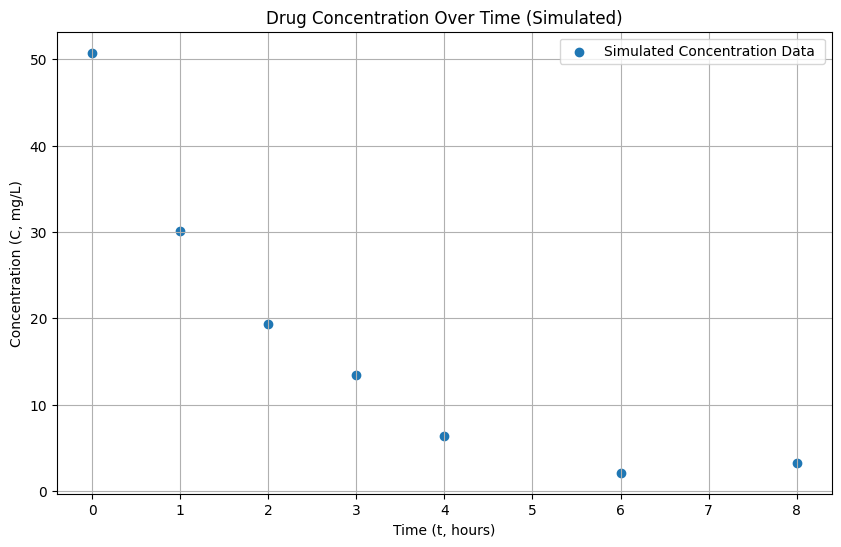

In [9]:
from scipy.optimize import curve_fit

# 1. Define the true underlying exponential decay function
# 1. 定义真实的内在指数衰减函数
def exponential_decay(t, C0, k):
    return C0 * np.exp(-k * t)

# 2. Simulate experimental data
# 2. 模拟实验数据
np.random.seed(42)
t_data = np.array([0, 1, 2, 3, 4, 6, 8]) # Time points in hours
true_C0, true_k = 50, 0.5
true_concentration = exponential_decay(t_data, true_C0, true_k)
noise = np.random.normal(0, 1.5, len(t_data))
c_data = true_concentration + noise

# 3. Visualize the data
# 3. 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(t_data, c_data, label='Simulated Concentration Data ')
plt.title('Drug Concentration Over Time (Simulated)')
plt.xlabel('Time (t, hours)')
plt.ylabel('Concentration (C, mg/L)')
plt.grid(True)
plt.legend()
plt.show()

**Step 2: Fit an Exponential Curve to the Data**
**第二步：对数据进行指数曲线拟合**

Unlike the previous example, this is not a polynomial. We need a more general tool for curve fitting. `scipy.optimize.curve_fit` is perfect for this. We provide it with the general form of the function we want to fit (in this case, `C(t) = C0 * e^(-kt)`) and the data, and it finds the best values for the parameters `C0` (initial concentration) and `k` (decay constant).
与上一个例子不同，这不是一个多项式。我们需要一个更通用的工具来进行曲线拟合。`scipy.optimize.curve_fit` 正好适用。我们为它提供我们想要拟合的函数的一般形式（这里是 `C(t) = C0 * e^(-kt)`）和数据，它就能为我们找到参数 `C0`（初始浓度）和 `k`（衰减常数）的最佳值。

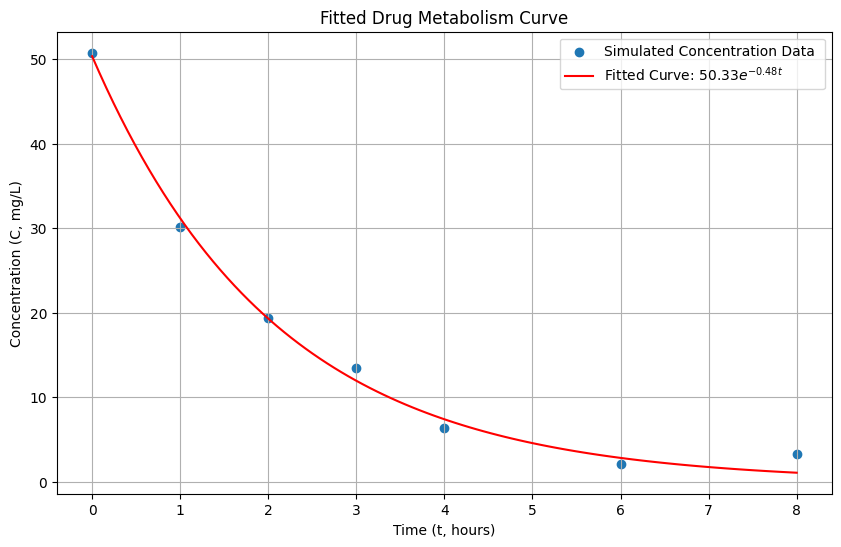

The fitted function is approximately: C(t) = 50.33 * e^(-0.48t)
(拟合出的函数大约是: C(t) = 50.33 * e^(-0.48t))


In [10]:
# 4. Use curve_fit to find the best parameters C0 and k
# 4. 使用 curve_fit 来找到最佳参数 C0 和 k
popt, pcov = curve_fit(exponential_decay, t_data, c_data, p0=(60, 0.6)) # p0 is an initial guess
fitted_C0, fitted_k = popt

# 5. Plot the results
# 5. 绘制结果
t_curve = np.linspace(0, 8, 100)
c_curve = exponential_decay(t_curve, fitted_C0, fitted_k)

plt.figure(figsize=(10, 6))
plt.scatter(t_data, c_data, label='Simulated Concentration Data ')
plt.plot(t_curve, c_curve, 'r-', label=f'Fitted Curve: ${fitted_C0:.2f}e^{{-{fitted_k:.2f}t}}$')
plt.title('Fitted Drug Metabolism Curve')
plt.xlabel('Time (t, hours)')
plt.ylabel('Concentration (C, mg/L)')
plt.grid(True)
plt.legend()
plt.show()

print(f"The fitted function is approximately: C(t) = {fitted_C0:.2f} * e^(-{fitted_k:.2f}t)")
print(f"(拟合出的函数大约是: C(t) = {fitted_C0:.2f} * e^(-{fitted_k:.2f}t))")

**Step 3: Differentiate and Analyze the Metabolism Rate**
**第三步：求导并分析代谢率**

Now that we have our data-driven model, we can use `SymPy` to find the metabolism rate at `t=2` hours.
现在我们有了数据驱动的模型，就可以用 `SymPy` 来计算 `t=2` 小时时的代谢率了。

In [ ]:
t = sp.Symbol('t')

# Use the fitted parameters to create the symbolic function
# 使用拟合出的参数创建符号函数
concentration_func_fitted = fitted_C0 * sp.exp(-fitted_k * t)
metabolism_rate_func_fitted = sp.diff(concentration_func_fitted, t)

# Calculate the rate at t=2 and get a floating-point result
# 计算 t=2 时的速率并得到一个浮点数结果
metabolism_rate_at_2_fitted = metabolism_rate_func_fitted.subs(t, 2).evalf()

print(f"Fitted Drug concentration function C(t) = {concentration_func_fitted}")
print(f"(拟合的药物浓度函数 C(t) = {concentration_func_fitted})")
print(f"Metabolism rate function R(t) = {metabolism_rate_func_fitted}")
print(f"(代谢率函数 R(t) = {metabolism_rate_func_fitted})")
print(f"The metabolism rate at t=2 hours is approximately: {metabolism_rate_at_2_fitted:.2f} (concentration units/hour)")
print(f"(在 t=2 小时，代谢率大约是: {metabolism_rate_at_2_fitted:.2f} (浓度单位/小时))")

print(f"\nThis is very close to the theoretical value of -9.20, confirming our model's accuracy.")
print(f"(这个值与理论值-9.20非常接近，证实了我们模型的准确性。)")

## 第二部分：偏导数 —— 洞察多因素下的单一变化
### Part 2: Partial Derivatives - Isolating Change in a Multifactorial World

### 1.2 偏导数 (Partial Derivative): 多因素下的单一变化
### 1.2 Partial Derivative: Change Under a Single Factor

在现实世界中，很多结果都是由多个因素共同决定的。比如，房间的舒适度由温度和湿度共同决定；一个App的日活用户数可能与广告投入、产品功能更新频率都有关系。

那么，当我们想知道**只改变其中一个因素**会带来多大影响时，应该怎么办呢？这就是偏导数要解决的核心问题。

In the real world, many outcomes are determined by multiple factors simultaneously. For example, the comfort level of a room depends on both temperature and humidity; the daily active users of an app might be related to advertising spend and the frequency of feature updates.

So, what if we want to know the impact of **changing only one of these factors**? This is the core problem that partial derivatives solve.

#### 步骤2：动手实验与探索 (Step 2: Hands-on Experiment)

**任务 (Task):** 假设当前湿度 `H` 固定在70%。现在只改变温度 `T`，舒适度会如何变化？
Let's assume the current humidity `H` is fixed at 70%. How does the comfort level change now if we only vary the temperature `T`?

**交互探索 (Interactive Exploration):** 我们使用 `ipywidgets` 创建一个滑块来固定 `H` 的值。当 `H` 固定时，3D曲面被“切”成了一条2D曲线。你可以拖动滑块，观察不同湿度下的“温度-舒适度”曲线。
We'll use `ipywidgets` to create a slider that fixes the value of `H`. When `H` is held constant, the 3D surface is "sliced" into a 2D curve. You can drag the slider to see the "Temperature-Comfort" curve at different fixed humidity levels.

In [11]:
from ipywidgets import interact, FloatSlider

# Define the comfort function based on the mathematical formula
# 根据数学公式定义舒适度函数
def comfort_function(T, H):
    return -(T - 25)**2 - 0.5 * (H - 60)**2

def plot_comfort_slice(fixed_H):
    T_vals = np.linspace(15, 35, 100)
    # H is now a fixed value
    C_vals = comfort_function(T_vals, fixed_H)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(T_vals, C_vals, label=f'Comfort at H={fixed_H:.1f}%')
    
    # 找到并标记最高点 (Find and mark the peak)
    max_comfort_T = T_vals[np.argmax(C_vals)]
    max_comfort_C = np.max(C_vals)
    ax.plot(max_comfort_T, max_comfort_C, 'ro') # 'ro' means red circle
    ax.annotate(f'Peak at T={max_comfort_T:.1f}°C',
                xy=(max_comfort_T, max_comfort_C),
                xytext=(max_comfort_T + 1, max_comfort_C - 10),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.set_title(f'Comfort vs. Temperature at a Fixed Humidity of {fixed_H:.1f}%')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Comfort Level')
    ax.grid(True)
    ax.legend()
    
    plt.show()
    plt.close(fig)

# 创建交互式滑块 (Create the interactive slider)
interact(plot_comfort_slice, fixed_H=FloatSlider(min=40, max=80, step=1, value=70, description='Fixed Humidity'));

interactive(children=(FloatSlider(value=70.0, description='Fixed Humidity', max=80.0, min=40.0, step=1.0), Out…

**观察 (Observation):**
当你固定住湿度 `H` 时，这个多变量问题就退化成了一个我们非常熟悉的单变量求导问题！我们可以轻易地找到这条2D曲线在任意一点的斜率，这个斜率就代表了**在当前湿度下，温度每变化一点点，舒适度会变化多少**。

When you fix the humidity `H`, the multivariable problem degenerates into a single-variable calculus problem we are very familiar with! We can easily find the slope of this 2D curve at any point. This slope represents **how much the comfort level changes for a tiny change in temperature, at the current humidity level**.

#### 步骤3：抽象与定义 (Step 3: Abstraction & Definition)

**顿悟 (The Insight):** 在多变量函数中，当我们**固定其他所有变量，只观察函数对某一个变量的变化率**时，这个变化率就是**偏导数 (Partial Derivative)**。
In a multivariable function, when we **hold all other variables constant and observe the rate of change with respect to just one variable**, this rate of change is the **Partial Derivative**.

**数学定义 (Mathematical Definition):**
舒适度对温度的偏导数，记作 `∂C/∂T` (读作 "partial C partial T")，就是将 `H` 暂时看作一个常数，然后对 `T` 求导。
The partial derivative of Comfort with respect to Temperature, denoted as `∂C/∂T`, is found by treating `H` as a constant and then differentiating with respect to `T`.

$$ C(T, H) = -(T - 25)^2 - 0.5(H - 60)^2 $$

To find `∂C/∂T`, we treat `H` as a constant (let's say `H_0`):
$$ \frac{\partial C}{\partial T} = \frac{\partial}{\partial T} \left[ -(T - 25)^2 - 0.5(H_0 - 60)^2 \right] $$

The second term is just a constant with respect to `T`, so its derivative is zero.
$$ \frac{\partial C}{\partial T} = -2(T - 25) - 0 = -2(T - 25) $$

同理，舒适度对湿度的偏导数 `∂C/∂H`，就是将 `T` 看作常数，对 `H` 求导：
Similarly, to find the partial derivative with respect to Humidity, `∂C/∂H`, we treat `T` as a constant:
$$ \frac{\partial C}{\partial H} = \frac{\partial}{\partial H} \left[ -(\text{const} - 25)^2 - 0.5(H - 60)^2 \right] = -0.5 \cdot 2(H - 60) = -(H - 60) $$

#### 步骤4：引入高效工具 (Step 4: Introducing Efficient Tools)

手动求导很棒，但对于复杂的函数会很繁琐。现在我们引入强大的符号计算工具 `sympy`，它可以完美地执行偏导数运算。
Manual differentiation is great for understanding, but it can be tedious for complex functions. Now, let's introduce the powerful symbolic computation tool `sympy`, which can perform partial differentiation perfectly.

**`sympy` 的 `diff` 函数** 天然支持偏导数。我们只需告诉它要求导的函数和我们感兴趣的变量即可。
**The `diff` function in `sympy`** naturally supports partial derivatives. We just need to provide the function and the variable of interest.

In [ ]:
import sympy as sp

# 1. 定义符号变量 (Define symbolic variables)
T, H = sp.symbols('T H')

# 2. 定义符号函数 (Define the symbolic function)
comfort_func_sp = -(T - 25)**2 - 0.5*(H - 60)**2
print(f"原始函数 C(T, H) = {comfort_func_sp}")
print("-"*50)

# 3. 计算对温度的偏导数 (Calculate the partial derivative with respect to T)
dC_dT = sp.diff(comfort_func_sp, T)
print(f"对温度的偏导数 ∂C/∂T 是 (The partial derivative w.r.t. T is): {dC_dT}")

# 4. 计算对湿度的偏导数 (Calculate the partial derivative with respect to H)
dC_dH = sp.diff(comfort_func_sp, H)
print(f"对湿度的偏导数 ∂C/∂H 是 (The partial derivative w.r.t. H is): {dC_dH}")

# 让我们代入一个具体的值来计算 (Let's substitute specific values)
T_val, H_val = 28, 70
dC_dT_val = dC_dT.subs({T: T_val, H: H_val})
dC_dH_val = dC_dH.subs({T: T_val, H: H_val})

print("-"*50)
print(f"在 T={T_val}, H={H_val} 时 (At T={T_val}, H={H_val}):")
print(f"∂C/∂T = {dC_dT_val}. 这意味着，如果此时只增加一点温度，舒适度会下降。 (This means if we slightly increase temperature, comfort will decrease.)")
print(f"∂C/∂H = {dC_dH_val}. 这意味着，如果此时只增加一点湿度，舒适度也会下降。 (This means if we slightly increase humidity, comfort will also decrease.)")

**解释 (Interpretation):** `sp.diff(func, var)` 完美地执行了偏导数的定义，自动将其他符号变量（如 `H`）视为常数来处理。计算结果 `-2*T + 50` 和 `-H + 60` 与我们手动推导的结果 `-2(T-25)` 和 `-(H-60)` 完全一致。
`sp.diff(func, var)` perfectly executes the definition of a partial derivative, automatically treating other symbolic variables (like `H`) as constants. The results `-2*T + 50` and `-H + 60` are identical to our manually derived results `-2(T-25)` and `-(H-60)`.

---

### 1.2.2 例子2：游戏角色的属性加点
### Example 2: Allocating Attribute Points for a Game Character

**生活场景 (Scenario):** 在一款角色扮演游戏中，角色的战斗力 `P(S, A)` 由力量(S, Strength)和敏捷(A, Agility)共同决定。
In an RPG, a character's Power `P(S, A)` is determined by Strength (S) and Agility (A).

**推理过程 (Reasoning):** 当你获得一个属性点，你需要在加“力量”还是“敏捷”之间做选择。如果你想知道**当前状态下，增加1点力量能带来多少战斗力提升**，你实际上就是在关心战斗力对力量的偏导数 `∂P/∂S`。
When you gain an attribute point, you must choose between increasing Strength or Agility. If you want to know **how much power you gain by adding 1 point to Strength at your current state**, you are essentially interested in the partial derivative of Power with respect to Strength, `∂P/∂S`.

**数学表达式 (Mathematical Expression):**
假设战斗力函数为 (Assume the power function is): $$P(S, A) = 2S^2 + 1.5A^2 + SA$$
这个公式表示力量和敏捷本身对战斗力有二次方的加成，同时两者之间还有协同效应（`SA`项）。
This formula implies that Strength and Agility contribute quadratically to power, and there's also a synergistic effect between them (the `SA` term).

In [ ]:
# 定义符号变量和函数 (Define symbolic variables and function)
S, A = sp.symbols('S A')
power_func = 2*S**2 + 1.5*A**2 + S*A

# 计算偏导数 (Calculate partial derivatives)
dP_dS = sp.diff(power_func, S)
dP_dA = sp.diff(power_func, A)

print(f"战斗力函数 P(S, A) = {power_func}")
print(f"对力量的偏导数 ∂P/∂S = {dP_dS}")
print(f"对敏捷的偏导数 ∂P/∂A = {dP_dA}")

# 假设当前角色属性为 S=10, A=12 (Assume current stats are S=10, A=12)
current_S, current_A = 10, 12
dP_dS_val = dP_dS.subs({S: current_S, A: current_A})
dP_dA_val = dP_dA.subs({S: current_S, A: current_A})

print("-"*50)
print(f"当 S={current_S}, A={current_A} 时:")
print(f"∂P/∂S = {dP_dS_val}. 此时增加一点力量，战斗力大约提升 {dP_dS_val}。")
print(f"∂P/∂A = {dP_dA_val}. 此时增加一点敏捷，战斗力大约提升 {dP_dA_val}。")

if dP_dS_val > dP_dA_val:
    print("\n结论：当前加‘力量’的收益更高！(Conclusion: Increasing 'Strength' provides a higher return right now!)")
else:
    print("\n结论：当前加‘敏捷’的收益更高！(Conclusion: Increasing 'Agility' provides a higher return right now!)")

---

### 1.2.3 例子3：在线广告的点击率
### Example 3: Click-Through Rate (CTR) of an Online Ad

**生活场景 (Scenario):** 一个在线广告的点击率 `CTR(T, I)` 由标题吸引力(T, Title attractiveness)和图片质量(I, Image quality)共同决定。T和I都可以量化为0-100的分数。
The Click-Through Rate `CTR(T, I)` of an online ad is determined by the Title's attractiveness (T) and the Image's quality (I). Both T and I can be quantified on a scale of 0-100.

**推理过程 (Reasoning):** 市场营销人员经常做A/B测试。当他们保持图片不变，只测试不同标题时，他们分析的就是点击率对标题吸引力 `T` 的偏导数 `∂CTR/∂T`。
Marketers often conduct A/B tests. When they keep the image the same but test different titles, they are analyzing the partial derivative of CTR with respect to Title attractiveness, `∂CTR/∂T`.

**数学表达式 (Mathematical Expression):**
假设点击率函数为 (Assume the CTR function is): $$CTR(T, I) = 0.01 \cdot T \cdot \ln(I)$$
这个模型假设标题吸引力是线性影响，而图片质量的影响是对数增长的（即图片从很差到一般提升很大，从很好到极好提升有限）。
This model assumes a linear impact from the title's attractiveness and a logarithmic impact from the image quality (i.e., improving a poor image yields a large gain, while improving an already great image yields a smaller gain).

In [ ]:
# 定义符号变量和函数 (Define symbolic variables and function)
T, I = sp.symbols('T I')
ctr_func = 0.01 * T * sp.ln(I)

# 计算偏导数 (Calculate partial derivatives)
dCTR_dT = sp.diff(ctr_func, T)
dCTR_dI = sp.diff(ctr_func, I)

print(f"点击率函数 CTR(T, I) = {ctr_func}")
print(f"对标题的偏导数 ∂CTR/∂T = {dCTR_dT}")
print(f"对图片的偏导数 ∂CTR/∂I = {dCTR_dI}")

# 假设当前广告素材评分为 T=70, I=80 (Assume current ad scores are T=70, I=80)
current_T, current_I = 70, 80
dCTR_dT_val = dCTR_dT.subs({T: current_T, I: current_I}).evalf() # .evalf() for numerical result
dCTR_dI_val = dCTR_dI.subs({T: current_T, I: current_I}).evalf()

print("-"*50)
print(f"当 T={current_T}, I={current_I} 时:")
print(f"∂CTR/∂T ≈ {dCTR_dT_val:.4f}. 此时每提升1点标题吸引力，CTR大约增加 {dCTR_dT_val:.4f}。")
print(f"∂CTR/∂I ≈ {dCTR_dI_val:.4f}. 此时每提升1点图片质量，CTR大约增加 {dCTR_dI_val:.4f}。")

print("\n这意味着，如果提升1点标题分和提升1点图片分的成本相同，那么优化标题是更高效的选择。")
print("(This means if the cost to improve the title score by 1 point is the same as for the image, optimizing the title is the more efficient choice.)")